# Machine Learning 

Before we dive into neural networks, let's take a moment to understand the broader context in which they operate: Machine Learning (ML).

## What is Machine Learning?

Machine Learning (ML) is a field of artificial intelligence (AI) that focuses on developing algorithms or computer models using data. The goal is to use these “trained” computer models to make decisions. Unlike traditional programming, where we write explicit rules for every situation, ML models learn patterns from data to perform tasks. Here is a general definition:

```{epigraph}
Machine Learning is the field of study that gives computers the ability to learn without being explicitly programmed. 
**— Arthur Samuel, 1959**
```

Over the years, ML algorithms have achieved great success in a wide variety of fields. Its success stories include disease diagnostics, image recognition, self-driving cars, spam detectors, and handwritten digit recognition. But we will focus on its application in geosciences.

## Machine Learning Vs. Traditional Programming

Machine Learning (ML) and traditional programming are two different paradigms used to solve problems and create intelligent systems. The primary difference lies in how they are instructed to solve a problem.

## A Simple Task

Suppose we want to build an intelligent system that identifies whether a given number is even or odd. This intelligent system can be represented mathematically as:

$$
y=f(x)
$$

Where:

- $x \to$ the number entered also called a feature.
- $y \to$ the outcome we want to predict.
- $f \to$ the model that gets the job done.


### Traditional Programming Approach

In traditional programming, the programmer writes explicit rules (code) for the program to follow. The system follows these instructions exactly to produce a solution.

```
def check_even_odd(number):
    if number % 2 == 0:
        return "Even"
    else:
        return "Odd"

# Usage
result = check_even_odd(4)  # Output: Even
```
<img src="./images/traditional_programming_flowchart.jpeg" alt="Firgure" width="500" height="500">

Tradition Programming Flowchart

### Machine Learning Approach

In Machine Learning, instead of writing explicit instructions, we provide a model with data and let it learn the patterns. The model, after training, can then make predictions or decisions based on what it has learned. 

<img src="./images/ML_flowchart.jpeg" alt="Ml Flow" width="500" height="500">

Machine Learning Flowchart

```{important}
Machine Learning is useful when the function ($f$) cannot be explicitly programmed or when the relationship between the feature(s) and outcome is unknown.
```

## How Do We Estimate $f$?

We must think about ML **only** if it is suitable for our work flow! 

### Machine Learning Algorithms

Machine learning algorithms can be categorized based on different criteria, each suited to different kinds of problems:

- **Supervised Learning**: The most common type of ML algorithm, where the model is trained on labeled data. For example, given past snow data, we can train a model to predict future snow water equivalent. Supervised learning is typically divided into two main types:
    * **Classification**: In classification tasks, the model predicts a discrete label or category. For example, a model might be trained to classify different types of snow conditions (e.g., powder, packed, ice) based on weather data.
    * **Regression**: In regression tasks, the model predicts a continuous value. For instance, predicting snow density using weather data.
- **Unsupervised Learning**: Here, the model works with unlabeled data, finding patterns or groupings in the data without explicit instructions. Examples include clustering or anomaly detection For example, grouping  SNOTEL sites based on similar snow accumulation trends or temperature profiles.
- **Reinforcement Learning**: A more advanced type of ML where the model learns by making decisions and receiving feedback (rewards or penalties). It's commonly used in robotics, game playing, and optimization problems.

```{note}
Most Machine Learning techniques can be characterised as either *parametric* or *non-parametric*. 

- **Parametric:** The parametric approach simplifies the problem of estimating $f$ to a parameter estimation problem. The disadvantage is that we assume a particular shape of $f$ that may not match the true shape of $f$. A common parametric method is the Linear Regression.

- **Non-parametric:** Non-parametric approaches do not assume any shape for $f$. Instead, they try to estimate $f$ that gets as close to the data points as possible. The disadvantage of non-parametric approaches is that they may require extensive training observations to estimate $f$ accurately. Common examples of non-parametric methods are the tree models, neural networks, etc.
```

In [218]:
import numpy as np
import matplotlib.pyplot as plt



def linear_function(x: float, noise: bool = False) -> float:
    """
    function to produce dummy linear data and add noise
    
    """
    if noise:
        the_noise = np.sin(x) + np.random.normal(0, 3)
        y = (2 * x) + the_noise
    else:
        y = 2 * x
    
    return y

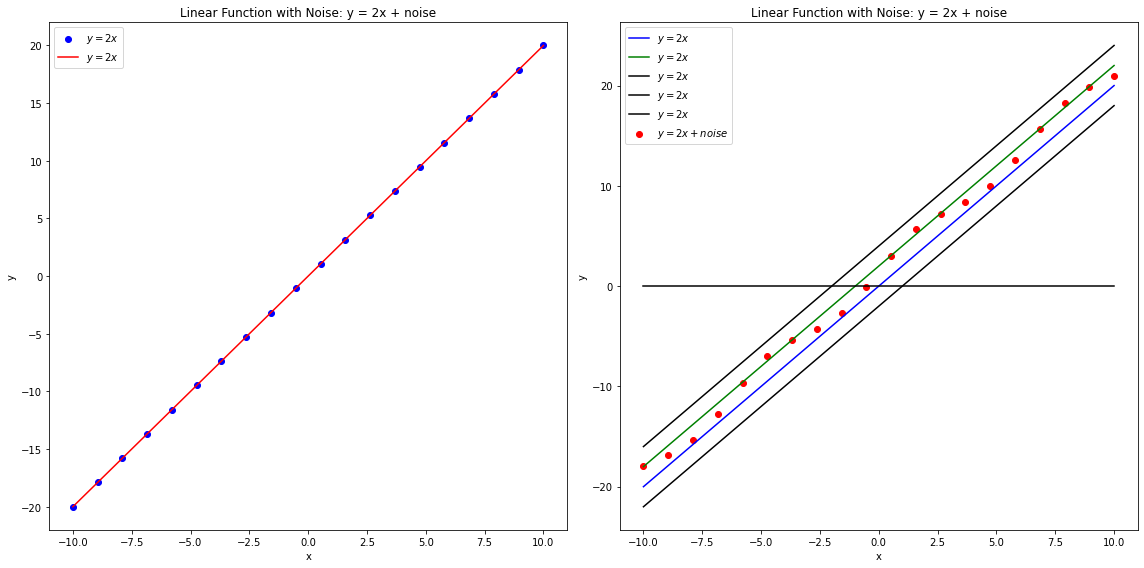

In [221]:
np.random.seed(42)

x_values = np.linspace(-10, 10, 20)
y_values = linear_function(x = x_values)
y_with_noise = linear_function(x=x_values, noise = True)

fig, axs = plt.subplots(1, 2, figsize=(16, 8))

axs[0].scatter(x_values, y_values, label=r'$y = 2x$', color='blue')
axs[0].plot(x_values, y_values, label=r'$y = 2x$', color='red')
axs[0].set_title('Linear Function with Noise: y = 2x + noise')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].legend()

axs[1].plot(x_values, y_values, label=r'$y = 2x$', color='blue')
axs[1].plot(x_values, y_values + 2, label=r'$y = 2x$', color='green')
axs[1].plot(x_values, y_values - 2, label=r'$y = 2x$', color='black')
axs[1].plot(x_values, y_values + 4, label=r'$y = 2x$', color='black')
axs[1].plot(x_values, [0] * x_values.shape[0], label=r'$y = 2x$', color='black')

axs[1].scatter(x_values, y_with_noise, label=r'$y = 2x + noise$', color='red')
axs[1].set_title('Linear Function with Noise: y = 2x + noise')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].legend()

plt.tight_layout()
plt.show()

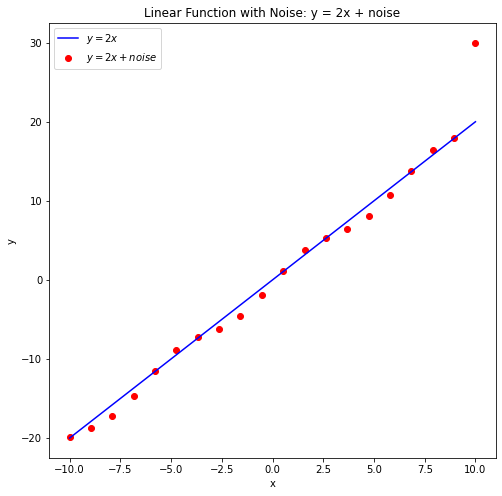

In [222]:
x_values = np.linspace(-10, 10, 20)
y_values = linear_function(x = x_values)
y_with_noise = linear_function(x=x_values, noise = True)
y_with_noise[-1] = 30

plt.figure(figsize=(8,8))
plt.plot(x_values, y_values, label=r'$y = 2x$', color='blue')
plt.scatter(x_values, y_with_noise, label=r'$y = 2x + noise$', color='red')
plt.title('Linear Function with Noise: y = 2x + noise')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Machine Learning Workflow

To wrap up our introduction to Machine Learning, here’s a typical workflow that you would follow when developing a machine learning model:

1. **Problem Definition**
   - Clearly define the problem you’re trying to solve. For example, predicting snow density from weather data.
   
2. **Data Collection**
   - Gather relevant data. In our case, we would collect data from SNOTEL sites, including snow depth, temperature, and precipitation measurements.

3. **Data Preprocessing**
   - Clean and preprocess the data to make it suitable for modeling. This might include handling missing values, normalizing data, or encoding categorical variables.
       - $f(networth) = (age, rent/mortgage , education, income)$
   
4. **Feature Engineering**
   - Select or create features (input variables) that will be used by the model to make predictions. For instance, we might use features like average temperature and total precipitation over a certain period.

5. **Model Selection**
   - Choose the type of model to use. For example, a neural network.

6. **Model Training**
   - Train the model using the training data. This involves feeding the data into the model and adjusting the model’s parameters to minimize prediction errors.

7. **Model Evaluation**
   - Evaluate the model’s performance using validation data. This helps ensure that the model generalizes well to unseen data.

8. **Model Tuning**
   - Fine-tune the model by adjusting hyperparameters or using techniques like cross-validation to improve performance.

9. **Model Deployment**
   - Deploy the model to a production environment where it can make real-time predictions.

10. **Monitoring and Maintenance**
    - Continuously monitor the model’s performance and update it as necessary to ensure it remains accurate and relevant.

This workflow (same as {numref}`ml-flow`) provides a high-level overview of the steps involved in a typical machine learning project. In the rest of this tutorial, we'll be applying parts of this workflow to predict snow density using neural networks and PyTorch.
